py 36 env. Don't forget to set the API key in system env.

https://www.clarifai.com/developer/quick-start/

On Images https://clarifai-python.readthedocs.io/en/latest/basics/#image

On byte images https://stackoverflow.com/questions/31077366/pil-cannot-identify-image-file-for-io-bytesio-object

On 23-2-2018 clarifai==2.0.33

There is no reason to use the Clarifai python library, can use Curl https://www.clarifai.com/developer/guide/

In [4]:
from clarifai.rest import ClarifaiApp
#from clarifai.rest import Image as ClImage
import requests as rq
import os
import io
import base64
from PIL import Image
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

def download_image(url, file_name):
    """"Convenience to download web image."""
    with open(file_name, "wb") as file:
        response = rq.get(url+file_name)
        file.write(response.content)
        print(file_name + " downloaded from " + url)
        
def list_files():
    """Convenience to list files in current directory."""
    return [f for f in os.listdir('.') if os.path.isfile(f)]


def load_api_secrets(filename):
    """Convenience to load the API key from a json file."""
    try:
        with open(filename, 'r') as fp:
            api_params = json.load(fp)
    except Exception as e:
        print('Failed to load API secrets key: {}'.format(e))
        api_params = None
    return api_params['key']

3.6.3 |Anaconda custom (64-bit)| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## API key
https://clarifai-python.readthedocs.io/en/latest/install/#configuration

api_key can be passed to the constructor (https://clarifai-python.readthedocs.io/en/latest/clarifai.rest/#clarifai.rest.client.ClarifaiApp), or set as an environment variable. 


In [5]:
API_key_filepath = 'Clarifai_API_key.json'
API_key = load_api_secrets(API_key_filepath)
API_key

'123456'

To load from desktop

In [6]:
API_key_filepath = '/Users/robincole/Desktop/Clarifai_API_key.json'
API_key = load_api_secrets(API_key_filepath)
#API_key

In [7]:
app = ClarifaiApp(api_key=API_key)  # the constructor with api_key

#app = ClarifaiApp()  # the constructor with api_key as an environment variable

In [8]:
general_model = app.models.get('general-v1.3')

In [9]:
#Face Detection model
face_model = app.models.get('face-v1.3') # Get the face model

In [10]:
base_url = 'https://samples.clarifai.com/'

## Intro tutorial
Load a sample image and classify

In [11]:
file_name = 'metro-north.jpg'
download_image(base_url, file_name)

metro-north.jpg downloaded from https://samples.clarifai.com/


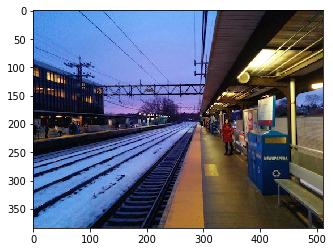

In [12]:
img = plt.imread(file_name)  # Creates an ndarray
plt.imshow(img)
plt.show()

In [13]:
byteImg = Image.open(file_name)  # JpegImageFile

In [14]:
byteImgIO = io.BytesIO()
byteImg.save(byteImgIO, "PNG")
byteImgIO.seek(0)
byteImg = byteImgIO.read()

In [29]:
# Image.open(io.BytesIO(byteImg))

Can predict from bytes

In [16]:
%%time
response = general_model.predict_by_bytes(byteImg)

CPU times: user 30.1 ms, sys: 7.83 ms, total: 37.9 ms
Wall time: 5.97 s


In [17]:
concepts = response['outputs'][0]['data']['concepts']
for concept in concepts:
    print(concept['name'], concept['value'])

train 0.9986649
railway 0.99700785
transportation system 0.99533427
locomotive 0.991434
station 0.9905962
travel 0.98675394
subway system 0.979722
traffic 0.9672344
commuter 0.9662427
blur 0.96467125
railroad track 0.9631884
urban 0.95843554
no person 0.9567106
platform 0.95601535
business 0.954004
track 0.94575775
city 0.9387636
fast 0.9367398
road 0.9299003
terminal 0.914779


Predict by filename, appears to be quicker

In [18]:
%%time
response = general_model.predict_by_filename(filename=file_name)

CPU times: user 25.9 ms, sys: 5.14 ms, total: 31.1 ms
Wall time: 2.93 s


In [19]:
concepts = response['outputs'][0]['data']['concepts']
for concept in concepts:
    print(concept['name'], concept['value'])

train 0.9987074
railway 0.9971303
transportation system 0.9954438
locomotive 0.9914662
station 0.9910724
travel 0.98730266
subway system 0.9797999
commuter 0.9676262
traffic 0.9670719
railroad track 0.96478844
blur 0.964049
urban 0.95840275
no person 0.95792305
platform 0.957827
business 0.95676255
track 0.9446391
city 0.9392204
fast 0.93650824
road 0.93066376
terminal 0.91909647


### Local image & face detection
Load a local image https://clarifai-python.readthedocs.io/en/latest/tutorial/#instantiate-an-image

Face detection https://clarifai-python.readthedocs.io/en/latest/tutorial-feedback/#face-detection-model-prediction

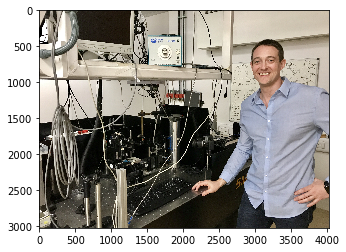

In [20]:
photos_path = '/Users/robincole/Documents/Data/photos/'
file_name = 'Robin_lab.JPG'
img = plt.imread(photos_path + file_name)
plt.imshow(img)
plt.show()

In [21]:
%%time
response = face_model.predict_by_filename(filename= photos_path + file_name)

CPU times: user 58.5 ms, sys: 32.6 ms, total: 91.1 ms
Wall time: 12 s


In [22]:
bounding_box = response['outputs'][0]['data']['regions'][0]['region_info']['bounding_box']
bounding_box

{'bottom_row': 0.3288591,
 'left_col': 0.72670805,
 'right_col': 0.8314986,
 'top_row': 0.18916923}

In [23]:
bounding_box['bottom_row']

0.3288591

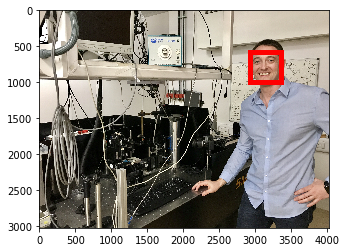

In [24]:
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Get the image rows and cols
img_rows = img.shape[0]
img_cols = img.shape[1]

x_orig = int(bounding_box['left_col']*img_cols)
y_orig = int(bounding_box['bottom_row']*img_rows)
width = int(bounding_box['right_col']*img_cols) - x_orig
height = int(bounding_box['top_row']*img_rows) - y_orig

rect = patches.Rectangle((x_orig,y_orig),width,height,linewidth=5,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
plt.savefig('face_identified.png')
plt.show()

Will Clarifai detect cartoon faces??

In [25]:
file_name = 'demo_3.jpg'
img = plt.imread(file_name)
response = face_model.predict_by_filename(filename=file_name)

In [26]:
faces = response['outputs'][0]['data']['regions']
print("There were {} faces identified".format(len(faces)))

There were 2 faces identified


In [27]:
face_number = 1 
bounding_box = response['outputs'][0]['data']['regions'][face_number]['region_info']['bounding_box']
bounding_box

{'bottom_row': 0.4952161,
 'left_col': 0.5136731,
 'right_col': 0.5977718,
 'top_row': 0.37205175}

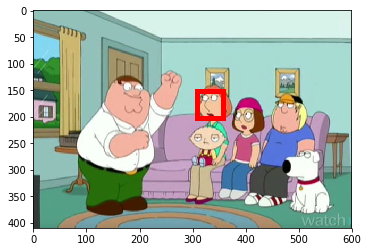

In [28]:
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Get the image rows and cols
img_rows = img.shape[0]
img_cols = img.shape[1]

x_orig = int(bounding_box['left_col']*img_cols)
y_orig = int(bounding_box['bottom_row']*img_rows)
width = int(bounding_box['right_col']*img_cols) - x_orig
height = int(bounding_box['top_row']*img_rows) - y_orig

rect = patches.Rectangle((x_orig,y_orig),width,height,linewidth=5,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

Interesting result..!